In [1]:
import tensorflow as tf
import numpy as np
import skimage.data as sc_data
import sympy as sy
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['image.cmap']='gray'

In [2]:
tf.random.set_seed(1000)
np.random.seed(1000)
tf.keras.backend.clear_session()

# Convolutional Layer


A convolutional layer consist of a set of learnable kernels (filters). During the forward pass, we cross-correlate (slide) each kernel across the width and height of the input `I` and compute dot products between the entries of the kernel and the input at any position. As we slide the filter or kernel over the width and height of the input we will produce a 2-dimensional feature map that gives the responses of that filter at every spatial position. 


An input `I` of size $I_{h} × I_{w}$ and a kernel `K` of size $K_{h} × K_{w}$ sliding with a size $S_{h} × S_{w}$  
will give an  `Output` of size
$output=\frac{I_{}-K_{h}+S_{h}}{S_{h}} \times \frac{I_{w}-K_{w}+S_{w}}{S_{w}} $

 If we represent the size of output by $m \times n$ where $m =\frac{I_{}-K_{h}+S_{h}}{S_{h}}$ and $n= \frac{I_{w}-K_{w}+S_{w}}{S_{w}} $

The output size is given by the  $floor(m) \times floor(n)   $

The output size is given by the  $\lfloor{m}\rfloor \times \lfloor{n}\rfloor $

 # Transpose Convolution

Transposed convolution upsample the spatial dimensions of the intermediate feature maps (inputs) which are reduced by the convolution  operations.

# NOTE:
>   Transposed convolutions – also called `fractionally strided convolutions or deconvolutions` – work by swapping the forward and backward passes of a convolution. One way to put it is to note that the kernel defines a convolution, but whether it’s a direct convolution or a transposed convolution is determined by how the forward and backward passes are computed.
([A guide to convolution arithmetic for deep learning, 2018](https://arxiv.org/abs/1603.07285))

> The transposed convolution also called backward convolution since it is the backward propagation of a convolutional layer
([Is the deconvolution layer the same as a convolutional layer?](https://arxiv.org/ftp/arxiv/papers/1609/1609.07009.pdf))



### Transpose Convolutional Layer with no padding

> if it's assumed that the convolution is non-padded $(p = 0)$ and that its input size $i$ is such that $i − k$ is a multiple of $s$. In that case, the following relationship holds: 

>Relationship 12. A convolution described by p = 0, k and s and whose input size is such that i−k is a multiple of s, has an associated transposed convolution described by $\acute{i}, \acute{k} = k, \acute{s} = 1 and \acute{p} = k−1$, where $\acute{i}$ is the size of the stretched input obtained by adding $s − 1$ zeros between each input unit, and its output size is$$ \acute{0}=s(\acute{i}-1)+k $$  [A guide to convolution arithmetic for deep learning,2018](https://arxiv.org/abs/1603.07285)

In keras if $i − k$ is not a multiple of $s$ then $$ \acute{0}=s(\acute{i}-1)+k +1$$


![Transposed convolution with a $2\times 2$ kernel. The shaded portions are a portion of an intermediate tensor as well as the input and kernel tensor elements used for the  computation.](../images/trans_conv.svg)

Source of image: [ 13.10. Transposed Convolution](http://d2l.ai/chapter_computer-vision/transposed-conv.html)

In [3]:
def Comp_Trans(conv,X):
    #X=tf.expand_dims(X,0)
    X=tf.reshape(X,(1,)+X.shape+(1,))
    y=conv(X)
    return tf.reshape(y,y.shape[1:3])
    

In [4]:
X = np.array([ [0,1.0], [2,3.0]])
tf.keras.backend.clear_session()
K=tf.keras.initializers.Constant([[0,1.0], [2,3.0]])
con2d=tf.keras.layers.Conv2DTranspose(1,kernel_size=(2,2),kernel_initializer=K)

result=Comp_Trans(con2d,X)

print(result.shape)

sy.Matrix(result)

(3, 3)


Matrix([
[0.0,  0.0, 1.0],
[0.0,  4.0, 6.0],
[4.0, 12.0, 9.0]])


In the transposed convolution, strides are specified for intermediate results (thus output), not for
input. so increasing the stride number will result in an increament in the in the size of the output

In [5]:
X = np.array([ [0,1.0], [2,3.0]])
tf.keras.backend.clear_session()
K=tf.keras.initializers.Constant([[0,1.0], [2,3.0]])
con2d=tf.keras.layers.Conv2DTranspose(1,kernel_size=(2,2),kernel_initializer=K,strides=(2,2))
result=Comp_Trans(con2d,X)
print(result.shape)
sy.Matrix(result)

(4, 4)


Matrix([
[0.0, 0.0, 0.0, 1.0],
[0.0, 0.0, 2.0, 3.0],
[0.0, 2.0, 0.0, 3.0],
[4.0, 6.0, 6.0, 9.0]])

In [6]:
X = np.array([[0.0,1, 1.0, 2.0], [3.0, 4.0,0, 5.0], [6.0, 7.0,0, 8.0],[2,3,4,4]])
tf.keras.backend.clear_session()
K=tf.keras.initializers.Constant([[0.0, 1.0], [2.0, 3.0]])
con2d=tf.keras.layers.Conv2DTranspose(1,kernel_size=(2,2),strides=(2,2),kernel_initializer=K)
result=Comp_Trans(con2d,X)
print(result.shape)

(8, 8)


In [7]:
X = np.array([[0.0,1, 1.0, 2.0], [3.0, 4.0,0, 5.0], [6.0, 7.0,0, 8.0],[2,3,4,4]])
tf.keras.backend.clear_session()
K=tf.keras.initializers.Constant([[0.0,2, 1.0], [2.0, 3,3.0]])
con2d=tf.keras.layers.Conv2DTranspose(1,kernel_size=(2,3),strides=(2,2),kernel_initializer=K)
result=Comp_Trans(con2d,X)
print(result.shape)

(8, 9)


# convolutions using matrix multiplications

The transposed convolution is named after the matrix transposition. To explain, let us first see how to implement convolutions using matrix multiplications. In the example below, we define a 4 × 4 input $I$ and a 3 × 3 convolution kernel $K$, and then use the Conv2D keras function to compute the convolution output Y.

In [8]:
I=np.array([[4,3,2,1],[1,4,3,2],[2,1,4,3.0],[3,2,1,4]])
K=np.array([[0,1.0,0],[-1,2.0,2],[0,1.0,0]])
I.shape,K.shape

((4, 4), (3, 3))

In [9]:
con2d=tf.keras.layers.Conv2D(1,kernel_size=(3,3),kernel_initializer=tf.keras.initializers.Constant(K))
Y=Comp_Trans(con2d,I)
sy.Matrix(Y)

Matrix([
[17.0, 12.0],
[14.0, 17.0]])

Next, we rewrite the convolution kernel K as a sparse weight matrix W containing a lot of zeros.
The shape of the weight matrix is (4, 16), where the non-zero elements come from the convolution kernel K

# Note the shape of matrix W is from the input I shape
16=4*4


In [10]:
def kernel2matrix(K):
    k, W = np.zeros(11), np.zeros((4, 16))
    k[:3], k[4:7],k[8:11] = K[0, :], K[1, :],K[2,:]
    W[0, :11], W[1, 1:12], W[2, 4:15], W[3, 5:] = k, k, k, k
    return W
W = kernel2matrix(K)
sy.Matrix(W)

Matrix([
[0.0, 1.0, 0.0, 0.0, -1.0,  2.0, 2.0, 0.0,  0.0,  1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
[0.0, 0.0, 1.0, 0.0,  0.0, -1.0, 2.0, 2.0,  0.0,  0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
[0.0, 0.0, 0.0, 0.0,  0.0,  1.0, 0.0, 0.0, -1.0,  2.0, 2.0, 0.0, 0.0, 1.0, 0.0, 0.0],
[0.0, 0.0, 0.0, 0.0,  0.0,  0.0, 1.0, 0.0,  0.0, -1.0, 2.0, 2.0, 0.0, 0.0, 1.0, 0.0]])

In [11]:
W.shape

(4, 16)

Concatenate the input I row by row to get a vector of length 16. Then the matrix multiplication of
W and the vectorized I gives a vector of length 4. After reshaping it, we can obtain the same result
Y from the original convolution operation above: we just implemented convolutions using matrix multiplications.

In [12]:
np.dot(W,I.reshape(-1)).reshape(2,2)

array([[17., 12.],
       [14., 17.]])

In [13]:
Y

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[17., 12.],
       [14., 17.]], dtype=float32)>

In [14]:
Y==np.dot(W,I.reshape(-1)).reshape(2,2)

<tf.Tensor: shape=(2, 2), dtype=bool, numpy=
array([[ True,  True],
       [ True,  True]])>

## implementing transposed convolutions using matrix multiplications


Likewise, we can implement transposed convolutions using matrix multiplications. In the following example, we take the 2 × 2 output Y from the above regular convolution as the input to the transposed convolution. To implement this operation by multiplying matrices, we only need to transpose the weight matrix W with the new shape 16 × 4

In [15]:
con2d=tf.keras.layers.Conv2DTranspose(1,kernel_size=(3,3),kernel_initializer=tf.keras.initializers.Constant(K))
Z=Comp_Trans(con2d,Y)
Z

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[  0.,  17.,  12.,   0.],
       [-17.,  36.,  75.,  24.],
       [-14.,  28.,  74.,  34.],
       [  0.,  14.,  17.,   0.]], dtype=float32)>

In [16]:
np.dot(W.T,Y.numpy().reshape(-1)).reshape(4,4)

array([[  0.,  17.,  12.,   0.],
       [-17.,  36.,  75.,  24.],
       [-14.,  28.,  74.,  34.],
       [  0.,  14.,  17.,   0.]])

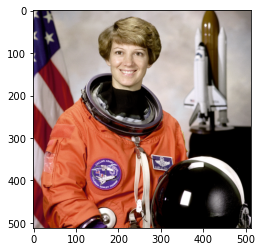

In [17]:
astronaut=sc_data.astronaut()
plt.imshow(astronaut)

In [18]:
def Comp_Mutlti(conv2d, image):
    img=tf.expand_dims(image,0)
    img=tf.dtypes.cast(img,tf.float32)
    Y=conv2d(img)
    # Exclude the first dimension that do not interest us: examples 
    return tf.reshape(Y,Y.shape[1:4])

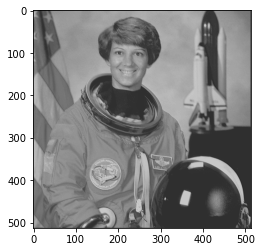

In [19]:
con2d=tf.keras.layers.Conv2DTranspose(filters=1,kernel_size=(2,2))
a=Comp_Mutlti(con2d,astronaut)
plt.imshow(a)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


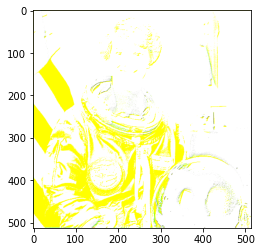

In [20]:
K=tf.keras.initializers.Constant([[2,1], [2,3]])
con2d=tf.keras.layers.Conv2DTranspose(filters=4,kernel_size=(2,2),kernel_initializer='random_uniform')
con_imgs=Comp_Mutlti(con2d,astronaut)
plt.imshow(con_imgs)

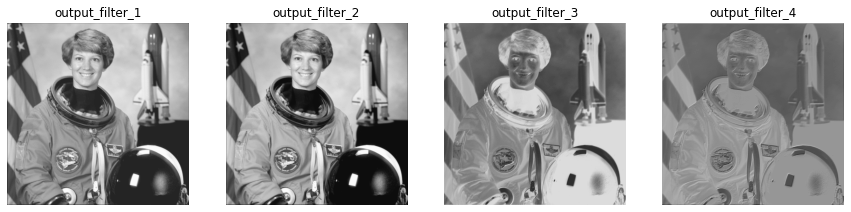

In [21]:
t=['output_filter_1','output_filter_2','output_filter_3', 'output_filter_4']

plt.figure(figsize=(15,10))
  
for i in range(4):
    ax=plt.subplot(1,4,i+1)
    ax.imshow(con_imgs[:,:,i])
    ax.set_title(t[i])
    ax.axis('off')

# References

[A guide to convolution arithmetic for deep learning,2018](https://arxiv.org/abs/1603.07285)

[Is the deconvolution layer the same as a convolutional layer?,2016](https://arxiv.org/ftp/arxiv/papers/1609/1609.07009.pdf)


[Fully Convolutional Networks for Semantic Segmentation,2015](https://arxiv.org/pdf/1411.4038.pdf)

[Visualizing and Understanding Convolutional Networks,2013](https://arxiv.org/pdf/1311.2901.pdf)

[ 13.10. Transposed Convolution](http://d2l.ai/chapter_computer-vision/transposed-conv.html)
